In [256]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [257]:
#####labor
shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']

shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]



In [266]:
##### import GAMS results
#########Benchmark characteristics
##############################################################################
##############################################################################

t='_d2_v2'

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

#########Full Result characteristics
##############################################################################
##############################################################################

###set file for imports
t='_d2_v2'

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/pl_rpt0.csv'%t)


###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/pc_rpt0.csv'%t)


####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/y_rpt0.csv'%t)


ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/ys0_rpt.csv'%t)


####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/py_rpt0.csv'%t)




In [259]:
########run without producer substitution

In [267]:
esubl_list=['staticmodel_d2_v2_it0_1.7_1_2',
           'staticmodel_d2_v2_it0_1.8_1_2', 'staticmodel_d2_v2_it0_1.9_1_2',
           'staticmodel_d2_v2_it0_2.0_1_2', 'staticmodel_d2_v2_it0_2.1_1_2',
           'staticmodel_d2_v2_it0_2.2_1_2', 'staticmodel_d2_v2_it0_2.3_1_2',
           'staticmodel_d2_v2_it0_2.4_1_2', 'staticmodel_d2_v2_it0_2.5_1_2',
           'staticmodel_d2_v2_it0_0.6_1_2','staticmodel_d2_v2_it0_0.7_1_2',
           'staticmodel_d2_v2_it0_0.8_1_2','staticmodel_d2_v2_it0_0.9_1_2', 
           'staticmodel_d2_v2_it0_1.0_1_2','staticmodel_d2_v2_it0_1.1_1_2', 
           'staticmodel_d2_v2_it0_1.2_1_2','staticmodel_d2_v2_it0_1.3_1_2',
           'staticmodel_d2_v2_it0_1.4_1_2','staticmodel_d2_v2_it0_1.5_1_2','staticmodel_d2_v2_it0_1.6_1_2']




In [269]:
pl_rpt0=pl_rpt0[pl_rpt0['file'].isin(esubl_list)]
pl_rpt0['esubl']=round(pl_rpt0['file'].apply(lambda x:x.split("_")[4]).astype(float),1)
pl_rpt0['esubl']=np.where(pl_rpt0['esubl']==1.6,.5,pl_rpt0['esubl'])
pl_rpt0=pl_rpt0[~pl_rpt0['region'].isin(['AK','DC','HI','NH','VT','WY','WV'])]



In [270]:
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1


In [271]:
# diff_from_base=pd.DataFrame()
# for sk in ['skl','unskl']:
#     for r in pl_rpt0_sk['region'].unique():
#         tmp=pl_rpt0_sk[(pl_rpt0_sk['region']==r) & (pl_rpt0_sk['esubl']==1.6) & (pl_rpt0_sk['skill']==sk) ]
#         tmp['base']=tmp['pl_diff']
#         tmp=tmp[['region','skill','base']]
#         diff_from_base=diff_from_base.append(tmp)

# pl_rpt0=pl_rpt0.merge(diff_from_base,on=['region','skill'])

# pl_rpt0['diff_from_base1']=pl_rpt0['base']-pl_rpt0['pl_diff']
# pl_rpt0['diff_from_base2']=pl_rpt0['base']-pl_rpt0['pl_diff']
# wage_group=pl_rpt0.groupby(by=['region','skill'],as_index=False).agg({'diff_from_base2':max,'diff_from_base1':min})

In [293]:
pl_rpt0[pl_rpt0['pl_shock0']==pl_rpt0['pl_shock0'].min()]

,file,region,skill,pl_shock0,esubl,pl_diff
105,staticmodel_d2_v2_it0_0.6_1_2,FL,unskl,0.930758,0.6,-0.069242


In [274]:
pl_rpt0_sk.sort_values(by='region')

,file,region,skill,pl_shock0,esubl,pl_diff,Difference in Price Change,first_diff
0,staticmodel_d2_v2_it0_1.0_1_2,AL,unskl,0.989166,1.0,-0.010834,0.003683,0.001129
19,staticmodel_d2_v2_it0_1.3_1_2,AL,unskl,0.991548,1.3,-0.008452,0.006065,0.001129
18,staticmodel_d2_v2_it0_0.7_1_2,AL,unskl,0.986612,0.7,-0.013388,0.001129,0.001129
17,staticmodel_d2_v2_it0_1.8_1_2,AL,unskl,0.994207,1.8,-0.005793,0.008723,0.001129
16,staticmodel_d2_v2_it0_0.8_1_2,AL,unskl,0.987631,0.8,-0.012369,0.002148,0.001129
...,...,...,...,...,...,...,...,...
861,staticmodel_d2_v2_it0_0.8_1_2,WI,unskl,1.052234,0.8,0.052234,-0.005223,-0.002758
860,staticmodel_d2_v2_it0_1.3_1_2,WI,unskl,1.043057,1.3,0.043057,-0.014400,-0.002758
878,staticmodel_d2_v2_it0_1.0_1_2,WI,unskl,1.047792,1.0,0.047792,-0.009666,-0.002758
868,staticmodel_d2_v2_it0_1.6_1_2,WI,unskl,1.039230,0.5,0.039230,-0.018228,-0.002758


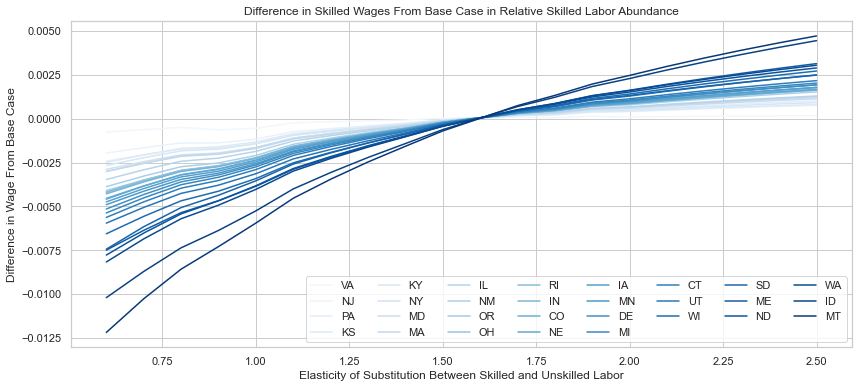

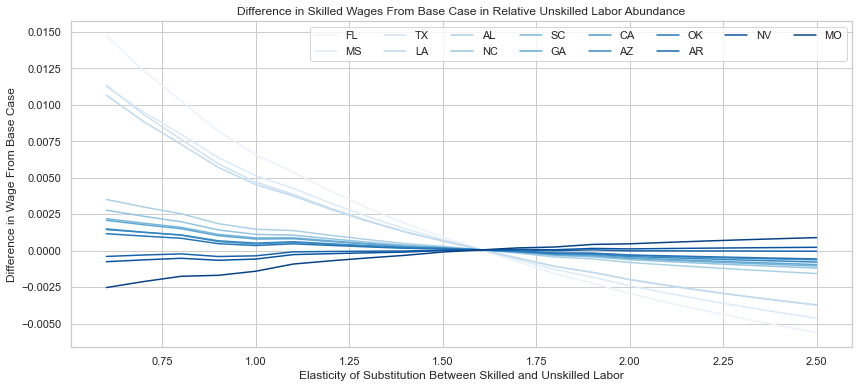

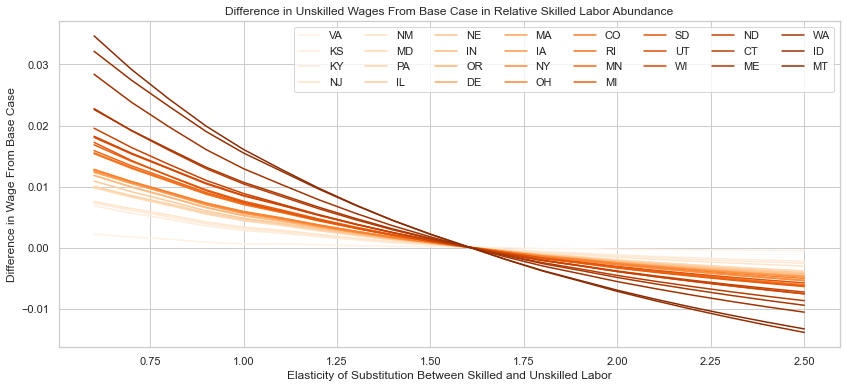

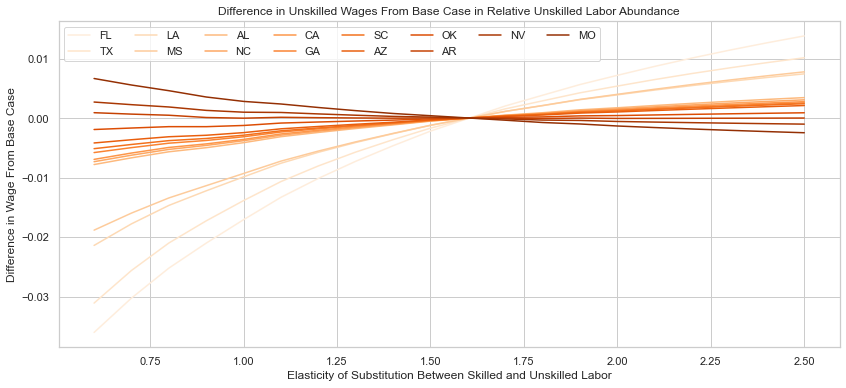

In [285]:
skill_abundance=labor_wage_pvt[labor_wage_pvt['difference']>0]['r'].unique()
not_skill_abundance=labor_wage_pvt[labor_wage_pvt['difference']<0]['r'].unique()

for sk, slab, c,sort in zip(['skl','unskl'],['Skilled','Unskilled'],['Blues','Oranges'],[False, True]):
    for lst, lab in zip([skill_abundance,not_skill_abundance],['Skilled Labor Abundance','Unskilled Labor Abundance']):
        pl_rpt0_sk=pl_rpt0[pl_rpt0['skill']==sk]

        ####take difference from first price
        pl_rpt0_sk=pl_rpt0_sk.sort_values(['region','esubl'])
        first_dates = pl_rpt0_sk.groupby('region')['pl_diff'].first()
        pl_rpt0_sk=pl_rpt0_sk.sort_values(by='region')
        pl_rpt0_sk['Difference in Wage From Base Case'] = (pl_rpt0_sk.set_index('region')['pl_diff'] - first_dates).values

        ####get first difference and assign graident color scheme accordingly

        first_diff=pd.DataFrame()
        for r in pl_rpt0_sk['region'].unique():
            tmp=pl_rpt0_sk[(pl_rpt0_sk['region']==r) & (pl_rpt0_sk['esubl']==.7) ]
            tmp['first_diff']=tmp['Difference in Wage From Base Case']
            tmp=tmp[['region','first_diff']]
            first_diff=first_diff.append(tmp)

        pl_rpt0_sk=pl_rpt0_sk.merge(first_diff,on='region')

        pl_rpt0_lm=pl_rpt0_sk[(pl_rpt0_sk['region'].isin(lst))].sort_values(by='first_diff',ascending=sort).reset_index()
        pl_rpt0_lm=pl_rpt0_lm[pl_rpt0_lm['esubl']!=.5]
        sns.set_theme(style="whitegrid")
        fig, ax = plt.subplots(1, 1,figsize=(14,6))

        sns.set_palette("PuBuGn_d")
        g = sns.lineplot(
            data=pl_rpt0_lm,  x="esubl", y='Difference in Wage From Base Case',hue='region', palette=c
        )
        plt.legend(ncol=8)
        plt.xlabel('Elasticity of Substitution Between Skilled and Unskilled Labor')
        plt.title('Difference in %s Wages From Base Case in Relative %s'%(slab,lab))

